In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
plt.style.use("https://raw.githubusercontent.com/FabianSchubert/mpl_style/main/custom_style.mplstyle")

col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [81]:
results_files = [
    f for f in listdir("./results_data/") if isfile(join("./results_data/", f))
]

In [82]:

for k, file in enumerate(results_files):
    _data = np.load(join("./results_data/", file), allow_pickle=True)

    _df = pd.DataFrame(
        {
            "Train Time [s]": _data["train_time"][()],
            "False Positive": _data["false_pos"][()],
            "False Negative": _data["false_neg"][()],
            "Error": _data["err"][()],
            "Event Based": _data["event_based"][()],
            "Threshold Scale": _data["settings"][()]["TH_SCALE"]
        },
        index=[k],
    )

    if k == 0:
        df_results = _df
    else:
        df_results = pd.concat([df_results, _df], ignore_index=True)

In [63]:
df_results

,Train Time [s],False Positive,False Negative,Error,Event Based,Threshold Scale
0,75.940318,0.019802,0.04,0.062500,True,0.215443
1,58.827010,0.039604,0.09,0.076923,True,2.154430
2,85.695968,0.059406,0.05,0.042105,True,0.100000
3,57.937773,0.029703,0.17,0.168675,True,2.154430
4,58.067972,0.000000,0.98,0.000000,True,10.000000
...,...,...,...,...,...,...
100,75.815522,0.039604,0.06,0.053191,True,0.215443
101,67.364527,0.059406,0.10,0.044444,True,0.464159
102,57.093209,0.000000,0.97,0.000000,True,10.000000
103,57.607231,0.000000,1.00,NaN,True,10.000000


In [60]:
np.any(np.isinf(df_results))

False

In [53]:
df_results[df_results["Event Based"]].mean()

Train Time [s]     78.819186
False Positive      0.033762
False Negative      0.212000
Error               0.076541
Event Based         1.000000
Threshold Scale     1.865358
dtype: float64

/its/home/fs388/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/fs388/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/fs388/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/its/home/fs388/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

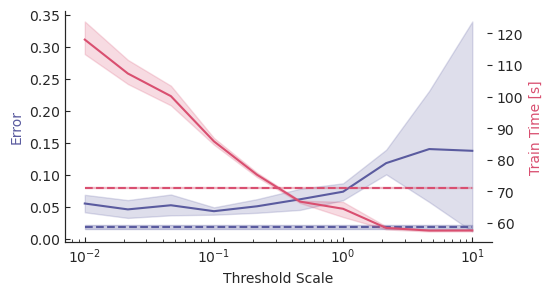

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3))

ax2 = ax.twinx()

sns.lineplot(
    data=df_results[df_results["Event Based"] == True],
    x="Threshold Scale",
    y="Error",
    color=col_cycle[0],
    ax=ax,
)
sns.lineplot(
    data=df_results, x="Threshold Scale", y="Train Time [s]", color=col_cycle[1], ax=ax2
)

th_scale = [df_results["Threshold Scale"].min(), df_results["Threshold Scale"].max()]

avg_cont = df_results[df_results["Event Based"] == False].mean()
sem_cont = df_results[df_results["Event Based"] == False].sem()

_avg_err_cont = avg_cont["Error"]
_sem_err_cont = sem_cont["Error"]
ax.plot(th_scale, [_avg_err_cont, _avg_err_cont], "--", color=col_cycle[0])
ax.fill_between(
    th_scale,
    [_avg_err_cont - _sem_err_cont, _avg_err_cont - _sem_err_cont],
    [_avg_err_cont + _sem_err_cont, _avg_err_cont + _sem_err_cont],
    alpha=0.3,
    color=col_cycle[0],
)

_avg_rt_cont = avg_cont["Train Time [s]"]
_sem_rt_cont = sem_cont["Train Time [s]"]

ax2.plot(th_scale, [_avg_rt_cont, _avg_rt_cont], "--", color=col_cycle[1])
ax2.fill_between(
    th_scale,
    [_avg_rt_cont - _sem_rt_cont, _avg_rt_cont - _sem_rt_cont],
    [_avg_rt_cont + _sem_rt_cont, _avg_rt_cont + _sem_rt_cont],
    alpha=0.3,
    color=col_cycle[1],
)

ax.set_xscale("log")

ax.yaxis.label.set_color(col_cycle[0])
ax2.yaxis.label.set_color(col_cycle[1])

plt.show()

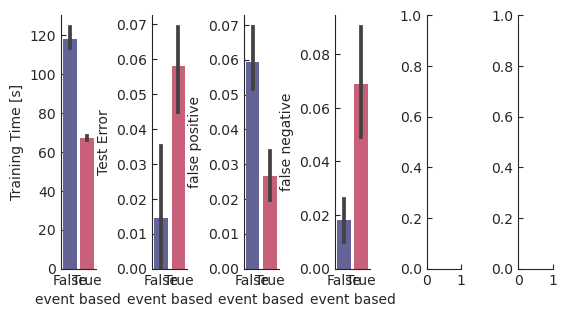

In [70]:
fig, ax = plt.subplots(2, 4, figsize=(5.5,3))

sns.barplot(data=df_results, x="event based", y="train time", ax=ax[0])
sns.barplot(data=df_results, x="event based", y="error", ax=ax[1])
sns.barplot(data=df_results, x="event based", y="false positive", ax=ax[2])
sns.barplot(data=df_results, x="event based", y="false negative", ax=ax[3])

ax[0].set_ylabel("Training Time [s]")
ax[1].set_ylabel("Test Error")

fig.tight_layout(pad=0.1)

plt.show()